In [3]:
using DataFrames, CSV, Plots
#, StatsPlots
import Dates

In [4]:
path_lin = "../"
path_win = "g://projectz"
path_used = path_lin
#full_name = joinpath(path_used,"stock/wydatki/lista_operacji_ekonto_2022_z_opisem.csv")
full_name = "/home/barabasz/Downloads/prywatne/lista_operacji_sty-sier-2022.csv"
wydatki_0 = CSV.read(full_name,DataFrame;delim=';',missingstring="");
wydatki_0 = dropmissing(wydatki_0,:Kwota);

LoadError: ArgumentError: column name :Kwota not found in the data frame

In [3]:
import Base.replace
function replace(str::AbstractString, dict::Dict{String, String})::String
    for kv in dict
        str = replace(str,kv)
    end
    str
end;

In [4]:
str = "-3 500,00 PLN"
str = replace(str, Dict(" " => "", "," => ".", "PLN" => ""))

"-3500.00"

In [5]:
toNum(x) = parse(Float32,replace(x, Dict(" " => "", "," => ".", "PLN" => "")));
wydatki_1 = transform(wydatki_0, :Kwota => (x->toNum.(x)) => :kwota)
wydatki = select(wydatki_1,Not(:Kwota));
przychody = wydatki[wydatki.kwota .>0, :]
wydatki = wydatki[wydatki.kwota .<0, :]
sort!(wydatki, :Data);
sort!(przychody, :Data);

In [6]:
first(wydatki.kwota,5)

5-element Vector{Float32}:
   -29.99
    -4.0
  -193.6
   -29.97
 -1062.91

In [7]:
year_month(x) = "$(Dates.year(x)):$(Dates.month(x))";
transform!(wydatki, :Data => (x->year_month.(x)) => :YearMonth)
transform!(przychody, :Data => (x->year_month.(x)) => :YearMonth)
#rename!(wydatki, Dict(:Data_function=>:YearMonth))
names(wydatki)

6-element Vector{String}:
 "Data"
 "Opis"
 "Rachunek"
 "Kategoria"
 "kwota"
 "YearMonth"

In [8]:
byMonth = groupby(wydatki[wydatki.kwota .< 0,:], :YearMonth);
monthTotal = combine(byMonth, :kwota => (x->-sum(x)) => :MonthTotal);
income = combine(groupby(przychody,:YearMonth), :kwota => sum => :MonthTotal);

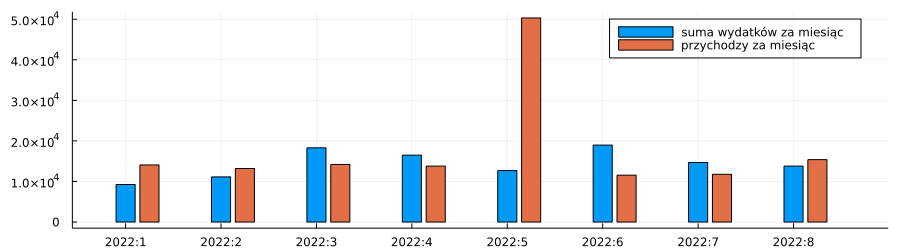

In [16]:
X1 = Vector{Float32}(0:length(monthTotal.MonthTotal))
xformatter(x) = monthTotal[convert(Int,x)+1,:YearMonth];
bar(monthTotal.YearMonth,monthTotal.MonthTotal; size=(900,250), bar_width=0.2, label="suma wydatków za miesiąc")#, xformatter=xformatter)
X2 = Vector{Float32}(0:nrow(income)).+ 0.25
bar!(X2,income.MonthTotal; size=(900,250), bar_width=0.2, label="przychodzy za miesiąc")#, xformatter=xformatter2)

In [17]:
repeat("G" .* string.(1:5), outer=2);

In [18]:
repeat("G" .* string.(1:5), inner=2);

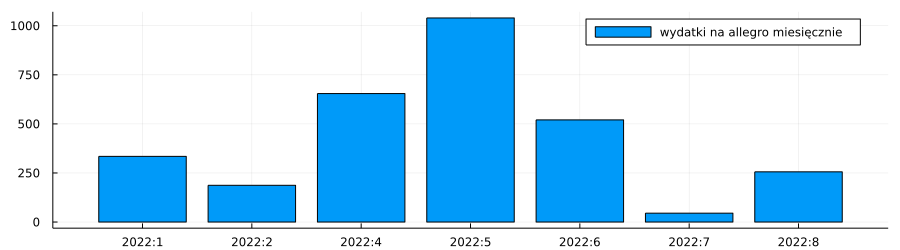

In [19]:
wydatki_z_opisem = dropmissing(wydatki,:Opis)
allegro = combine( groupby(wydatki_z_opisem[occursin.("ALLEGRO.PL",wydatki_z_opisem.Opis),:], :YearMonth), :kwota => (x->-sum(x)) => :allegro)
bar(allegro.YearMonth,allegro.allegro, label="wydatki na allegro miesięcznie",size=(900,250))

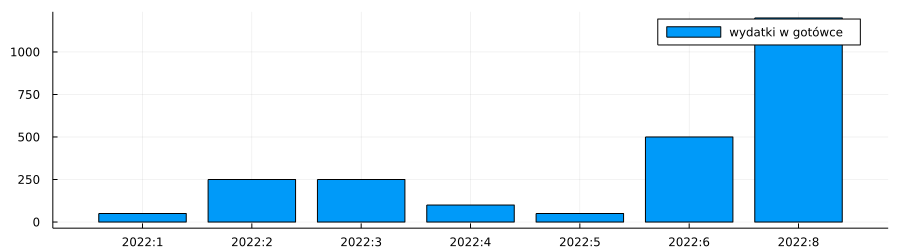

In [31]:
gotowka = combine(groupby(wydatki_z_opisem[occursin.("ATM KRAJOWY",wydatki_z_opisem.Opis),:], :YearMonth), :kwota => (x->-sum(x)) => :gotowka)
bar(gotowka.YearMonth, gotowka.gotowka, label="wydatki w gotówce", size=(900,250))

In [28]:
oplaty_opis = ["TAURON","TOYA","WSPÓLNOTA","Storytel","NETFLIX","SPOTIFY","ORANGE","PGNIG","CINKCIARZ"]
żywność_opis = ["ZABKA","LIDL","CARREFOUR","KAUFLAND", "GALERIA SMAKU U JACKA","STOKROTKA","BIEDRONKA","LEWIATAN","Groszek"]
knajpy_opis = ["MIJAMOJE","TARASY","BISTRO","YANA","T E A TIME","SPAGHETTERIA", "Drukarnia","KOLANKO"]
import Base.occursin
function occursin(tekst,lista)  #::Vector{AbstractString})
    for o in lista
        if occursin(o,tekst)
            return true
        end
    end
    false
end;
function kat_oplaty(tekst)
    occursin(tekst,oplaty_opis)
end;
function kat_żywność(tekst)
    occursin(tekst,żywność_opis)
end;
function kat_knajpy(tekst)
    occursin(tekst,knajpy_opis)
end;

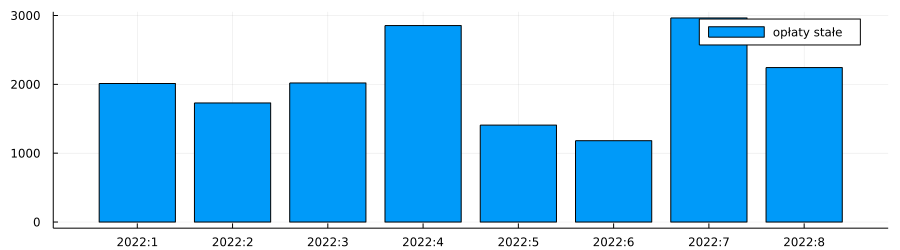

In [29]:
oplaty_ym = groupby(wydatki_z_opisem[ kat_oplaty.(wydatki_z_opisem.Opis), :], :YearMonth);
#keys(oplaty_ym)[5]
#oplaty_ym[keys(oplaty_ym)[5]][!,:];
oplaty_tot = combine(oplaty_ym, :kwota => (x->-sum(x)) => :suma)
bar(oplaty_tot.YearMonth, oplaty_tot.suma, label="opłaty stałe", size=(900,250))

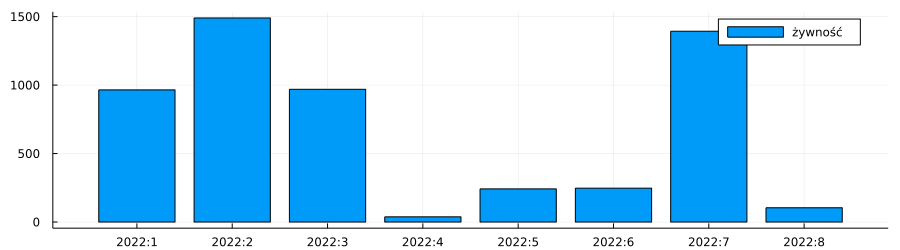

In [30]:
żytność_monthly = combine(groupby(wydatki_z_opisem[ kat_żywność.(wydatki_z_opisem.Opis), :], :YearMonth), :kwota => (x->-sum(x)) => :suma)
bar(żytność_monthly.YearMonth, żytność_monthly.suma, label="żywność", size=(900,250))

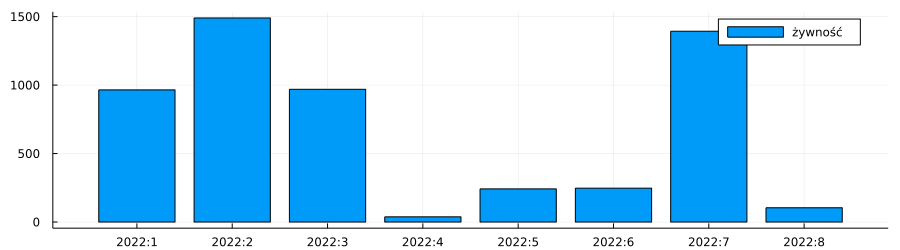

In [31]:
knajpy_monthly = combine(groupby(wydatki_z_opisem[ kat_knajpy.(wydatki_z_opisem.Opis), :], :YearMonth), :kwota => (x->-sum(x)) => :suma)
bar(żytność_monthly.YearMonth, żytność_monthly.suma, label="żywność", size=(900,250))

In [25]:
monthTotal[monthTotal.YearMonth .== "2022:2",:]

,YearMonth,MonthTotal
,String,Float32
1,2022:2,11132.5


In [162]:
byMonthCat = groupby(wydatki, [:YearMonth, :Kategoria]);

In [163]:
keys(byMonthCat)

581-element DataFrames.GroupKeys{GroupedDataFrame{DataFrame}}:
 GroupKey: (YearMonth = "2019:1", Kategoria = "Rozrywka - inne")
 GroupKey: (YearMonth = "2019:1", Kategoria = "\xafywno\x9c\xe6 i chemia domowa")
 GroupKey: (YearMonth = "2019:1", Kategoria = "Sport i hobby")
 GroupKey: (YearMonth = "2019:1", Kategoria = "Prezenty i wsparcie")
 GroupKey: (YearMonth = "2019:1", Kategoria = "Bez kategorii")
 GroupKey: (YearMonth = "2019:1", Kategoria = "Przejazdy")
 GroupKey: (YearMonth = "2019:1", Kategoria = "Wyp\xb3ata got\xf3wki")
 GroupKey: (YearMonth = "2019:1", Kategoria = "Op\xb3aty i odsetki")
 GroupKey: (YearMonth = "2019:1", Kategoria = "Jedzenie poza domem")
 GroupKey: (YearMonth = "2019:1", Kategoria = "Parking i op\xb3aty")
 GroupKey: (YearMonth = "2019:1", Kategoria = "Alkohol")
 GroupKey: (YearMonth = "2019:1", Kategoria = "TV, internet, telefon")
 GroupKey: (YearMonth = "2019:1", Kategoria = "Gaz")
 ⋮
 GroupKey: (YearMonth = "2022:2", Kategoria = "gaba")
 GroupKey: (YearMont

In [73]:
combine(byMonthCat,:kwota => (x->-sum(x)) => :suma_wydatkow);